In [1]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
from sklearn import metrics

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)


In [3]:
df = pd.read_csv("Weather.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2357 non-null   object 
 1   Location       2357 non-null   object 
 2   MinTemp        2284 non-null   float64
 3   MaxTemp        2292 non-null   float64
 4   Rainfall       2287 non-null   float64
 5   Evaporation    1494 non-null   float64
 6   Sunshine       1420 non-null   float64
 7   WindGustDir    2075 non-null   object 
 8   WindGustSpeed  2075 non-null   float64
 9   WindDir9am     2237 non-null   object 
 10  WindDir3pm     2275 non-null   object 
 11  WindSpeed9am   2279 non-null   float64
 12  WindSpeed3pm   2279 non-null   float64
 13  Humidity9am    2260 non-null   float64
 14  Humidity3pm    2228 non-null   float64
 15  Pressure9am    2105 non-null   float64
 16  Pressure3pm    2102 non-null   float64
 17  Cloud9am       1513 non-null   float64
 18  Cloud3pm

In [14]:
# Checking for null values
df.isna().sum()

Date               0
Location           0
MinTemp           73
MaxTemp           65
Rainfall          70
Evaporation      863
Sunshine         937
WindGustDir      282
WindGustSpeed    282
WindDir9am       120
WindDir3pm        82
WindSpeed9am      78
WindSpeed3pm      78
Humidity9am       97
Humidity3pm      129
Pressure9am      252
Pressure3pm      255
Cloud9am         844
Cloud3pm         912
Temp9am           75
Temp3pm          107
RainToday         70
RainTomorrow      72
dtype: int64

In [5]:
# statistical info of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,2284.0,14.629553,5.909057,-1.0,10.2,15.10,19.100,30.5
MaxTemp,2292.0,26.783988,7.533610,8.0,21.3,26.70,32.200,46.8
Rainfall,2287.0,2.335724,10.844625,0.0,0.0,0.00,0.200,278.4
Evaporation,1494.0,7.440830,4.357865,0.0,4.4,6.90,9.800,37.2
Sunshine,1420.0,9.016127,4.042427,0.0,6.5,10.25,12.300,14.2
WindGustSpeed,2075.0,43.501205,12.246834,17.0,35.0,43.00,50.000,115.0
WindSpeed9am,2279.0,15.258447,8.257882,0.0,9.0,15.00,20.000,54.0
WindSpeed3pm,2279.0,20.494076,8.355724,0.0,15.0,20.00,26.000,57.0
Humidity9am,2260.0,62.829204,19.382180,9.0,51.0,64.00,77.000,100.0
Humidity3pm,2228.0,45.044434,22.560786,2.0,26.0,45.00,62.000,100.0


In [6]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [7]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [8]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.964361
WindGustSpeed     0.000000
WindDir9am        5.091218
WindDir3pm        3.478999
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         35.808231
Cloud3pm         38.693254
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.969877
RainTomorrow      3.054731
dtype: float64

In [9]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am") #calculate most frequent value and fills missing values
mode_nan(df,"Cloud3pm")

In [10]:
#converts categorical data to numeric
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,6.9,10.25,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0,0
1,02-12-2008,Albury,7.4,25.1,0.0,6.9,10.25,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3,0,0
2,03-12-2008,Albury,12.9,25.7,0.0,6.9,10.25,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,0,0
3,04-12-2008,Albury,9.2,28.0,0.0,6.9,10.25,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,1.0,1.0,18.1,26.5,0,0
4,05-12-2008,Albury,17.5,32.3,1.0,6.9,10.25,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,15-02-2009,Richmond,15.6,21.7,27.6,6.9,10.25,S,35.0,SSW,...,93.0,90.0,1015.2,1014.1,1.0,1.0,17.6,20.1,1,1
2353,16-02-2009,Richmond,16.5,24.4,39.8,6.9,10.25,SE,52.0,SSW,...,97.0,60.0,1018.1,1017.4,1.0,1.0,18.3,22.5,1,1
2354,17-02-2009,Richmond,16.5,21.8,3.4,1.8,10.25,SE,31.0,SSW,...,94.0,67.0,1017.3,1015.7,1.0,1.0,18.2,21.4,1,1
2355,18-02-2009,Richmond,17.4,27.4,13.6,1.7,10.25,SSW,35.0,SW,...,83.0,55.0,1011.0,1008.4,1.0,1.0,20.5,26.4,1,0


In [11]:
#replacing categorical values to respective numerical values
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [12]:
location = {'Adelaide' : 1, 'Albany' : 2, 'Albury' : 3, 'AliceSprings' : 4, 'BadgerysCreek' : 5,	'Ballarat' : 6, 	
            'Bendigo' : 7, 'Brisbane' : 8, 'Cairns' : 9,'Canberra' : 10,	'Cobar' : 11,	'CoffsHarbour' : 12,	'Dartmoor' : 13,	
            'Darwin' : 14, 'GoldCoast' : 15, 'Hobart' : 16, 'Katherine' : 17,	'Launceston' : 18,	'Melbourne' : 19,	'MelbourneAirport' :	20,
            'Mildura' : 21, 'Moree' : 22,	'MountGambier' : 23,	'MountGinini' : 24,	'Newcastle' : 25, 'Nhil' : 26, 'NorahHead' : 27, 	'NorfolkIsland' : 28,	'Nuriootpa' : 29,	
            'PearceRAAF' : 30, 'Penrith' : 31, 'Perth' : 32, 'PerthAirport' : 33, 'Portland' : 34, 'Richmond' : 35, 'Sale' : 36, 'SalmonGums' : 37,	'Sydney' : 38, 
            'SydneyAirport' : 39, 'Townsville' : 40, 'Tuggeranong' : 41,	'Uluru' : 42, 'WaggaWagga' : 43, 'Walpole' : 44, 'Watsonia' : 45, 
            'Williamtown' : 46, 'Witchcliffe' : 47, 'Wollongong' : 48,	'Woomera' : 49} 
df["Location"] = df["Location"].map(location)

In [18]:
df.head().T

,0,1,2,3,4
Date,01-12-2008,02-12-2008,03-12-2008,04-12-2008,05-12-2008
Location,3,3,3,3,3
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,6.9,6.9,6.9,6.9,6.9
Sunshine,10.25,10.25,10.25,10.25,10.25
WindGustDir,4.0,2.0,5.0,11.0,4.0
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,5.0,0.0,5.0,13.0,12.0


In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
df=df.drop(["MinTemp","Temp9am","MaxTemp","Temp3pm","Date"],axis=1)


In [15]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=42)

In [16]:
from collections import Counter
os = SMOTE(random_state = 42)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
count = Counter(y_train_res)
print(count)

Counter({0: 1572, 1: 1572})


In [17]:
classifier = RandomForestClassifier(n_estimators=300) # increasing number of trees for better accuracy
classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=300)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       394
           1       0.64      0.63      0.63        78

    accuracy                           0.88       472
   macro avg       0.78      0.78      0.78       472
weighted avg       0.88      0.88      0.88       472

Accuracy of the Random Forest Model is: 87.92372881355932 %


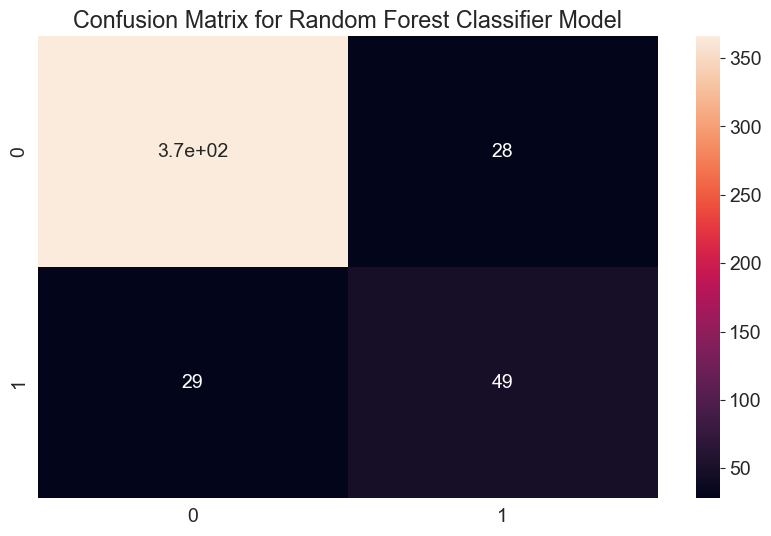

In [18]:
# accuracy of Random Forest Classifier Model
y_pred1 = classifier.predict(X_test)
report1 = classification_report(y_test, y_pred1)
print(report1)
print("Accuracy of the Random Forest Model is:",accuracy_score(y_test,y_pred1)*100,"%")
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.show()# accuracy of Random Forest Classifier Model


0.7785695691787062

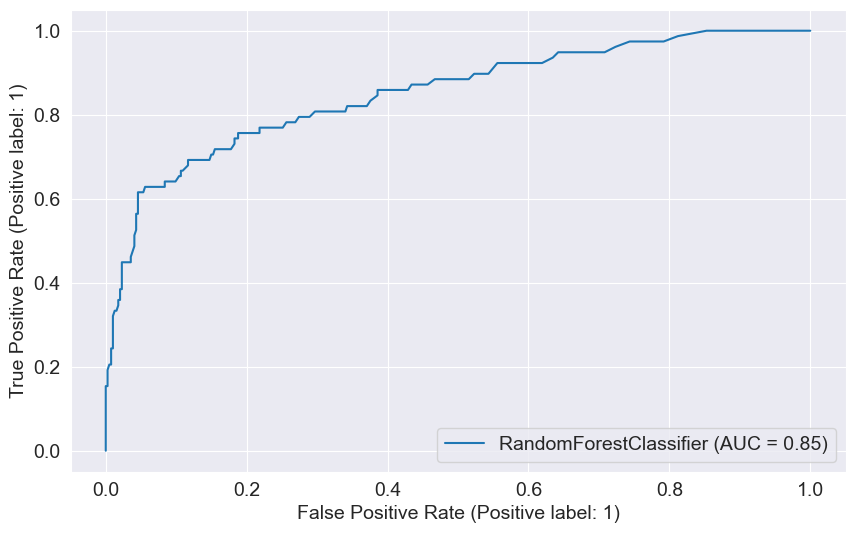

In [19]:
metrics.plot_roc_curve(classifier, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       394
           1       0.48      0.78      0.60        78

    accuracy                           0.82       472
   macro avg       0.72      0.81      0.74       472
weighted avg       0.87      0.82      0.84       472

Accuracy of the Logistic Regression Model is: 82.41525423728814 %


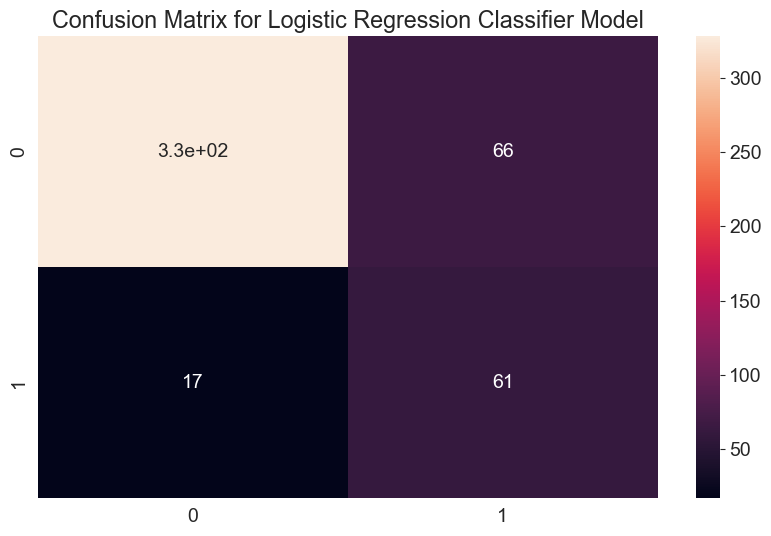

In [20]:
lr_cls = LogisticRegression() 
lr_cls.fit(X_train_res, y_train_res)

y_pred2 = lr_cls.predict(X_test)
report2 = classification_report(y_test, y_pred2)
print(report2)
print("Accuracy of the Logistic Regression Model is:",accuracy_score(y_test,y_pred2)*100,"%")
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True)
plt.title("Confusion Matrix for Logistic Regression Classifier Model")
plt.show()